> Statistical significance is the least interesting thing about the results. You should describe the results in terms of measures of magnitude –not just, does a treatment affect people, but how much does it affect them. ~Gene V. Glass

>The primary product of a research inquiry is one or more measures of effect size, not P values. ~Jacob Cohen


__Note__ For this notebook I follow the discussion made in R.R.Pagano, 'Understanding the Statistics in Behaviour Sciences.' p 329

# Effect Size

__Discussion__ Hypothesis Testing Recall

__Q__: What do we answer with an hypothesis testing?

## Size of Effect: Significant vs Important 

Q: Consider the case where we analyzed the results of an social experiment with an hypothesis testing. Suppose at the end we concluded that the results are significant. What do we really mean by this?

Let's try to explain what we mean: 


__Scenerio__: Are SAT-Math scores at one college greater than the known population mean of 500?

Data are collected from a random sample of 1,200 students at that college. The population standard deviation unknown. Find a one-sample mean test and determine p_value. Then determine whether null hypothesis should be rejected ($\alpha = 0.05$).


__Your Turn__

- Write null-hypothesis

- Write alternative hypothesis (use one sided alternative hypothesis)

- Determine the significance level.

$H_{a}$: SAT Math scores at college X are greater than the national average (500)

$H_{0}$ SAT Math scores at college X are the same (or lower than) then national average (500)

$\alpha$: 0.05

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# use this pickled object to run the
# hypothesis testing

import numpy as np
from scipy import stats
import pickle

with open('sample1.pickle', 'rb') as f:
    sample = pickle.load(f)

In [4]:
sample.shape

(1200,)

In [5]:
sample.mean()

508.3923958670853

In [6]:
# population mean
mu = 500

In [7]:
# sample mean
x_bar = sample.mean()

In [8]:
# standard error
# note that we don't know the population standard deviation
# so instead we will use sample standard deviation as an estimator

s = sample.std(ddof=1)

se = s / np.sqrt(len(sample))

In [9]:
s

100.34695740686509

In [10]:
se

2.896767143560673

In [12]:
# t-score: divide the difference in means
# divided by standard error

t = (x_bar - mu) / se
t

2.897159299027912

In [15]:
n = len(sample)
# note that we know that t-score should lie on a t-distribution with
# degrees of freedom len(sample) - 1 as the parameter.
# let's use t method from scipy.stats

p_value = stats.t.sf(t, df=n-1)

In [17]:
# same thing as 
1 - stats.t.cdf(t, df=n-1)

0.0019170045698054805

In [16]:
p_value

0.0019170045698055093

In [20]:
# same thing but with ttest_1samp?
stats.ttest_1samp(sample, mu).pvalue / 2

0.001917004569805514

In [21]:
stats.ttest_1samp(sample, mu)

Ttest_1sampResult(statistic=2.8971592990279116, pvalue=0.003834009139611028)

## Cohen's D for measuring effect size for one sample tests for the mean

It looks like there is a statistically significant difference in the exam scores between our sample and the population. Now question is this difference important?

-  Cohen (1988) gave a very simple method for determining the magnitude of the importance.

__Case 1:__ When we know the population std!

$$ d = \frac{|\bar{x} - \mu |}{\sigma} $$

- $\bar{x}$ sample mean
- $\mu$ population mean
- $\sigma$ population standard deviation
- $|\cdot|$ absolute value

!! Wait a minute is this the same with z-score?

__Case 2:__ When the population std is not available!

$$ d = \frac{|\bar{x} - \mu |}{s} $$


- $\bar{x}$ sample mean
- $\mu$ population mean
- $s$ sample standard deviation


<table>
  <tr>
    <th>Header value of $d$</th>
    <th>Header interpretation of d</th>
  </tr>
  <tr>
    <td>0.0 - 0.20</td>
    <td>small effect</td>
  </tr>
  <tr>
    <td>0.20 - 0.79</td>
    <td> medium effect</td>
  </tr>
    <tr>
    <td>$\geq$ 0.80</td>
    <td> large effect</td>
  </tr>
</table>


__Your turn__ Find the Cohen's d score for the above problem.

In [28]:
np.abs(x_bar - mu) / s

0.08363378505894961

We observed that the particular student's SAT-Math scores are different from the national average with the significance level 0.05. However, when we check effect size with Cohen's d statistic we observed that the effect is not important. 

## Resources

[Different Effect Size Measures and Calculators](https://www.psychometrica.de/effect_size.html)

[An interesting paper on effect size- Especially check the section:  Calculation of Sample Size Example](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3444174/)

[An comprehensive discussion of effect size](https://machinelearningmastery.com/effect-size-measures-in-python/)

[Wiki for list of different available effect size measures](https://en.wikipedia.org/wiki/Effect_size)

#  Power of an Hypothesis Testing

- Recall $\alpha$ is the probability of making Type-I error when the null hypothesis is true.

- What about the the probability of making Type - II errors?

 - (We will call this probability as $\beta$.)
 
- Power of a statistical test measures an experiment's ability to reject a null-hypothesis when $H_{a}$ is true.
 
 Mathematically, the __power__ of an experiment is defined as the probability (1- $\beta$) that the results of an experiment will allow rejection of the null hypothesis if the independent variable has a real effect.


## Power calculations


A quality control manager must decide to accept a shipment of batteries from a supplier or to return the shipment because of poor quality. Assume that design specifications require batteries from the supplier to have a mean useful life of at least 120 hours. To evaluate the quality of an incoming shipment, a sample of 36 batteries will be selected and tested. On the basis of the sample, a decision must be made to accept the shipment of batteries or to return it to the supplier because of poor quality.


__Your Turn__

- Write a null-hypothesis

- Write alternative hypothesis (use one sided test)

- Set the significance level

- Assume that the population standard deviation is known and equals to 12 (ie. $\sigma =12$)

- Use z-test to find critical number hours to decline shipping.

$H_{0}$: this shipment of batteries has a useful life of 120 hours or more

$H_{a}$: this shipment of batteries has a useful life of less than 120 hours

$\alpha$: 0.05

In [29]:
# variations in battery hours
sigma = 12

# number of batteries in the sample set
n = 36

# Hypothesized mean battery hours

mu = 120

# Standard deviation of the sampling mean distribution otherwise known as standard error

standard_error = sigma/np.sqrt(n)

standard_error

2.0

In [30]:
# find critical z_score first

norm_dist = stats.norm(loc=0, scale=1)

# note that ppf takes a probability value and returns the corresponding value for the random variable.
# Since we do one sided tail test we will give alpha = 0.05
z_critical = norm_dist.ppf(0.05)
z_critical

-1.6448536269514729

Now we can find what is the critical average battery hours under which we will reject the shipping.

In [31]:
nono_value = mu + z_critical*standard_error

nono_value

116.71029274609705

In [32]:
# We could find with a little bit simpler method

mean_dist = stats.norm(loc=120, scale=standard_error)

mean_dist.ppf(0.05)

116.71029274609705

[Critical z_value calculator - a little bit slow though](https://mathcracker.com/z_critical_values#results)

__Exercise__

- Can you write a python function that does the same thing in the app?

__What this means?__

For any sample mean value smaller than 116.71 we decided to send the shipment back to the distributor. We know that we can make type-I errors with 0.05 chance. This means if batteries were good, i.e. their average hours is 120 as it is promised, and if we take 100 random samples from this shipment we might send the shipment 5 times wrongly. 

__What can happen?__

- Option - I : The batteries were good and we mistakenly send them back. -- How likely is this?

- Option - II: Batteries were not good and we mistakenly didn't send them back. -- How likely is this?


__Part - II__

Let's investigate the second option in more details! Suppose the actual battery average was 112 hours. Then what can we tell about the procedure?

<img src="img/beta.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />

In [36]:
# Probability of failing to reject null hypothesis when the true value was 112.
beta = stats.norm(loc=112, scale=2).sf(116.71)
beta

0.00926135284833626

In [40]:
stats.norm(loc=112, scale=2).cdf(116.71)

0.9907386471516637

In [37]:
1-beta

0.9907386471516637

__Your turn__

- What would be the $\beta$ if the true value for the average battery hour was 115. 

In [38]:
# Probability of failing to reject null hypothesis when the true value was 115.
beta = stats.norm(loc=115, scale=2).sf(116.71)
beta

0.1962755738745453

In [39]:
power = 1 - beta
power

0.8037244261254547

<img src="img/power_curve_table.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />

<img src="img/power_curve.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />

<img src="img/power_sample_size.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />

# Calculating Sample Size Given Effect Size Power and $\alpha$

In [41]:
from statsmodels.stats.power import TTestIndPower

In [46]:
analysis = TTestIndPower()

# parameters for power analysis
effect = 0.08
alpha = 0.0001
nobs = 10000

# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect,
                              power=.9,
                              nobs1=None,
                              ratio=1.0,
                              alpha=alpha)
print('Nobs: %.3f' % result)

Nobs: 8363.493


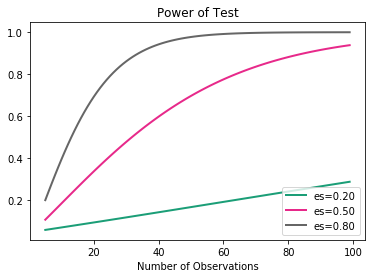

In [47]:
from statsmodels.stats.power import TTestIndPower
from numpy import array
from matplotlib import pyplot
%matplotlib inline
# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 100))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
                    effect_size=effect_sizes)
pyplot.show()